# Recordatorio distribución de Poisson

$$X \sim Poisson(\lambda)$$

$$P(X=k)=\frac{\lambda ^{k}e^{-\lambda }}{k!}$$

para $k = 0, 1, 2,..$

La distribución de Poisson es una distribución de probabilidad discreta que expresa, a partir de una frecuencia de ocurrencia media, la probabilidad de que ocurra un determinado número de eventos durante cierto período de tiempo. Concretamente, se especializa en la probabilidad de ocurrencia de sucesos con probabilidades muy pequeñas, o sucesos raros. 

In [1]:
from scipy.stats import poisson        # distribucion de poisson

import pylab as plt
import seaborn as sns

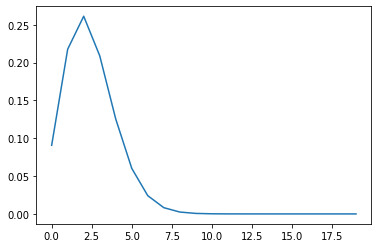

In [2]:
x=[i for i in range(20)]  # nº de sucesos, eje x

lamb=2.4  # media de ocurrencia

y=[poisson.pmf(x, lamb) for x in x]   # evaluacion de la pmf para cada nº de sucesos, eje y

plt.plot(x, y);

# Modelo de Dixon-Coles (Maher)

La idea detrás del modelo de [Dixon-Coles](http://web.math.ku.dk/~rolf/teaching/thesis/DixonColes.pdf) es que el gol es un evento raro en un partido de fútbol y se podría usar la distribución de Poisson para predecir el resultado de un partido.


Para el nº de goles X del equipo local i-esimo y el nº de goles Y del equipo visitante j-esimo se tendria:

$$X \sim Poisson(\lambda)$$

$$P(X=k)=\frac{\lambda^{k}e^{-\lambda}}{k!}$$

$$Y \sim Poisson(\mu)$$

$$P(Y=k)=\frac{\mu^{k}e^{-\mu}}{k!}$$

donde:

$\lambda = \gamma\alpha_{i}\beta_{j} = \exp^{(\gamma+\alpha_{i}+\beta_{j})}$

$\mu = \alpha_{j}\beta_{i}  = \exp^{(\alpha_{j}+\beta_{i})}$

El modelo introduce varios parámetros para relacionar los equipos y los partidos, un parámetro llamado `gamma` es el parámetro de jugar en casa, los parámetros llamados `alfa` son los parámetros de ataque de cada equipo y los parámetros `beta` son los de defensa de cada equipo.

Asi pues, la funcion que define el partido, la funcion principal del modelo, nuestro `predict` es:

$$P(X=x, Y=y)=\frac{\lambda^{x}e^{-\lambda}}{x!} · \frac{\mu^{y}e^{-\mu}}{y!}$$

La funcion de coste o perdida, nuestro `fit`, en este caso se calcula con la [estamacion maximo verosimil](https://es.wikipedia.org/wiki/M%C3%A1xima_verosimilitud). Sería el productorio en todo el espacio de probabilidad de la funcion principal, llamada funcion de verosimilitud.

$$L(X=x, Y=y)=\prod_{i=1}^{n}\frac{\lambda^{x}e^{-\lambda}}{x!} · \frac{\mu^{y}e^{-\mu}}{y!}$$

Debido a la regla de la cadena, minimizar esta funcion es muy costoso, por lo que se realiza un truco matematico que consiste en aplicar el logaritmo. Esto es debido a la regla de los logaritmos: $log(a·b)=log(a)+log(b)$. Por tanto, la nueva funcion a ser optimizada (maximizada) es llamada log-verosimilitud.

$$l(X=x, Y=y)=\sum_{i=1}^{n}\log(\frac{\lambda^{x}e^{-\lambda}}{x!}) + \log(\frac{\mu^{y}e^{-\mu}}{y!})$$

La idea es: dados los resultados de los partidos de futbol, estimar el parametro de jugar en casa `gamma`, los parametros de ataque para cada equipo `alfa` y los parametros de defensa para cada equipo `beta`.

### Datos

Veamos primero la extracción de datos desde [aqui](https://www.football-data.co.uk/).

## Modelo de Poisson

**fit**

**predict**

**Walk-Forward BackTesting**

![wfbt](images/wfbt.gif)